<a href="https://colab.research.google.com/github/paper-prism/paper-prism/blob/main/paper_prism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Sep 21 07:07:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# !pip install kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nelgiriyewithana/emotions

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/emotions
License(s): other
emotions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = 'emotions.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall('/content')
  print('Done')

Done


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns

# Preparation in advance

1. 데이터 확인
2. 데이터 전처리
3. train_test_split

In [ ]:
text = pd.read_csv('/content/text.csv', index_col = 0)

text.head(3)

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4


In [ ]:
print(f'shape: {text.shape}')
print('\n')
print(f'isnull: \n{text.isnull().sum()}')
print('\n')
print(f'duplicated: {text.duplicated().sum()}')

shape: (416809, 2)


isnull: 
text     0
label    0
dtype: int64


duplicated: 686


Six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In [ ]:
text.drop_duplicates(ignore_index = True, inplace = True)
text.duplicated().sum()

0

In [ ]:
emotions = {0: 'sadeness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

text['emotion'] = text['label'].replace(emotions)

text.head()

,text,label,emotion
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,sadeness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,sadeness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


In [ ]:
text.tail()

,text,label,emotion
416118,i feel like telling these horny devils to find...,2,love
416119,i began to realize that when i was feeling agi...,3,anger
416120,i feel very curious be why previous early dawn...,5,surprise
416121,i feel that becuase of the tyranical nature of...,3,anger
416122,i think that after i had spent some time inves...,5,surprise


In [ ]:
count = text['emotion'].value_counts()

<ipython-input-14-a9bca15f5680>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs, palette="viridis")


Text(0.5, 1.0, 'Count of Categories')

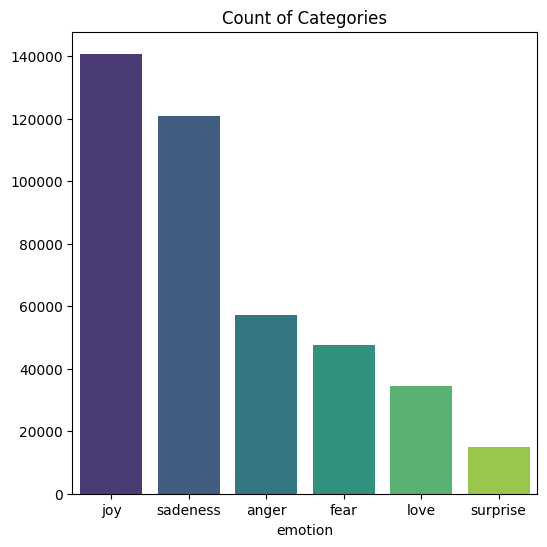

In [ ]:
fig, axs = plt.subplots(figsize = (6, 6), facecolor='white')
palette = sns.color_palette("viridis")
sns.set_palette(palette)

sns.barplot(x=count.index, y=count.values, ax=axs, palette="viridis")
axs.set_title('Count of Categories')

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(text, test_size = 0.1, random_state = 111)

train_df.to_csv('train_data.csv', index = False)
test_df.to_csv('test_data.csv', index = False)

In [ ]:
train_df

,text,label,emotion
148610,i feel very awkward about and have learned a l...,0,sadeness
36755,i was already feeling disheartened and tired,0,sadeness
414498,i was feeling lame,0,sadeness
163370,i just have some residual feelings of chivalry...,0,sadeness
395459,i feel uncertain about the next steps each day...,4,fear
...,...,...,...
105747,i feel like the other idolises her friend it s...,1,joy
102486,i am feeling this moment as gentle or there is...,2,love
135892,im not going to lie it makes me feel like hes ...,0,sadeness
10196,im beginning to put my trust in you because i ...,1,joy


# Data Cleansing

2. 텍스트 전처리
3. 토크나이즈
4. 데이터 정리
5. 레이블 인코딩 확인

In [ ]:
!pip install transformers
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 82.7 MB/s eta 0:00:00


In [ ]:
!pip install accelerate

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
import transformers; transformers.__version__

'4.44.2'

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BitsAndBytesConfig, AutoModelForCausalLM
from datasets import Dataset
import torch
import os
import gc

In [ ]:
try:
    import accelerate
except Exception as e:
    !pip install -q -U transformers
    !pip install -q datasets accelerate
    !pip install -q lomo-optim

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

### 평가하기

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.9 MB/s eta 0:00:00


In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
id6label = {0: 'sadeness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
label6id = {'sadeness': 1, 'joy': 2, 'love': 3, 'anger': 3, 'fear': 4, 'surprise': 5}

# Model Finetuning

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=6, id2label=id6label, label2id=label6id
)

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.gradient_checkpointing_enable()  # 모델의 gradient checkpointing 활성화

In [ ]:
# from torch.nn import DataParallel

# model = DataParallel(model)

In [ ]:
# torch.cuda.device_count()

1

In [ ]:
training_args = TrainingArguments(
    output_dir="result",
    learning_rate=2e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=1,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.203900,0.207096,0.934391


TrainOutput(global_step=37451, training_loss=0.3901140340794002, metrics={'train_runtime': 1664.7281, 'train_samples_per_second': 22.497, 'train_steps_per_second': 22.497, 'total_flos': 998092217269332.0, 'train_loss': 0.3901140340794002, 'epoch': 1.0})

In [ ]:
text = "This was a masterpiece. wow"

#text에 pdf가 들어가야하고, pdf를 읽을 때는 한 페이지씩 끊어서 들어가야함
#한 페이지를 읽는 방법도 정의할 필요가 있어보임. 페이지를 한 문장으로 요약해서 색깔을 만들것 인지, 페이지 문장 전체를 읽고 평균값으로 색깔을 만들것인지
#pdf
#색깔은 처음 데이터 전처리할 때, label에 색깔(RGB code)을 부여하거나.. 그런 식으로 진행해야할듯
#한 페이지에서
#

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="/content/result/checkpoint-37451")
classifier(text)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'joy', 'score': 0.9790725111961365}]

In [ ]:
#-> RGB